# I. Analyse du graphe ***club de karaté Zachary***


Le graphe du **club de Karaté Zachary**  a été introduit par Wayne Zachary
dans un article publié en 1977 et il est depuis l’un des exemples d’initiation les plus célèbres d’analyse de réseaux sociaux.  Ce dernier modélise les relations entre 34 membres du club de karaté : chaque nœud représente un individu, et les liens/arêtes représentent les individus qui interagissent en dehors du cadre du club de karaté (par exemple, passer du temps ensemble, comme se retrouver pour boire un café en dehors des horaires d’entrainements).


Nous allons utiliser la bibliothéque Networkx pour charger le graphe et l'analyser.

Documentation Networkx : https://networkx.org/documentation/stable/index.html


In [ ]:
import networkx as nx
G = nx.karate_club_graph()


***1. Caractéristiques du graphe Zachary Karaté Club***


1.   Quel le type de ce graphe? Orienté ou non orienté?
1.   Combien de noeuds y-a-t'il dans le graphe?
2.   Combien d'arêtes  y-a-t'il dans le graphe?
1.   Calculer le degrée moyen du graphe.









In [ ]:
# à faire : Répondre aux questions 1..4
from networkx import karate_club_graph

# Charger le graphe Zachary Karaté Club
graph = karate_club_graph()

# 1. Type de graphe : Orienté ou non orienté ?
graph_type = "Orienté" if graph.is_directed() else "Non orienté"

# 2. Nombre de nœuds
num_nodes = graph.number_of_nodes()

# 3. Nombre d'arêtes
num_edges = graph.number_of_edges()

# 4. Calcul du degré moyen
average_degree = sum(dict(graph.degree()).values()) / num_nodes

graph_type, num_nodes, num_edges, average_degree


('Non orienté', 34, 78, 4.588235294117647)

***2. Les attributs des noeuds***

Le graphe contient deux membres principaux, l’administrateur (officer) – M. John (nœud 33) et l'instructeur ( - M. Hi (nœud 0).  À la suite d’un conflit entre ces deux membres, le club s’est devisé en deux nouveaux clubs. Un club dirigé par M.  John et l’autre par M. Hi. Chaque membre du Club à décider de rejoindre un des deux nouveaux clubs.

Le choix du nouveau club de chaque membre est donnée par l'attribut 'club' de chaque noeud.

*   Afficher le choix du nouveau club de tous les membres
*   Visualiser le graphe en utilsant le layout circular_layout()
*   Afficher les noeuds ayant choisi Mr. Hi en rouge les autres en Bleu


Indication : https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw



In [ ]:
# à faire :  Afficher l'attribut 'club' de chaque membre
############# Votre code ici ############


# 1. Afficher le choix du nouveau club pour chaque membre
node_clubs = {node: G.nodes[node]['club'] for node in G.nodes()}
node_clubs

{0: 'Mr. Hi',
 1: 'Mr. Hi',
 2: 'Mr. Hi',
 3: 'Mr. Hi',
 4: 'Mr. Hi',
 5: 'Mr. Hi',
 6: 'Mr. Hi',
 7: 'Mr. Hi',
 8: 'Mr. Hi',
 9: 'Officer',
 10: 'Mr. Hi',
 11: 'Mr. Hi',
 12: 'Mr. Hi',
 13: 'Mr. Hi',
 14: 'Officer',
 15: 'Officer',
 16: 'Mr. Hi',
 17: 'Mr. Hi',
 18: 'Officer',
 19: 'Mr. Hi',
 20: 'Officer',
 21: 'Mr. Hi',
 22: 'Officer',
 23: 'Officer',
 24: 'Officer',
 25: 'Officer',
 26: 'Officer',
 27: 'Officer',
 28: 'Officer',
 29: 'Officer',
 30: 'Officer',
 31: 'Officer',
 32: 'Officer',
 33: 'Officer'}

In [ ]:
# à faire :  Recuperer la liste des membres du club Hi_Club
# Recuperer la liste des membres du club Officer_Club
Hi_club = []
Officer_Club = []
############# Votre code ici #################
# 2. Identifier les membres de chaque club
Hi_club = [node for node, attr in G.nodes(data=True) if attr['club'] == 'Mr. Hi']
Officer_club = [node for node, attr in G.nodes(data=True) if attr['club'] == 'Officer']

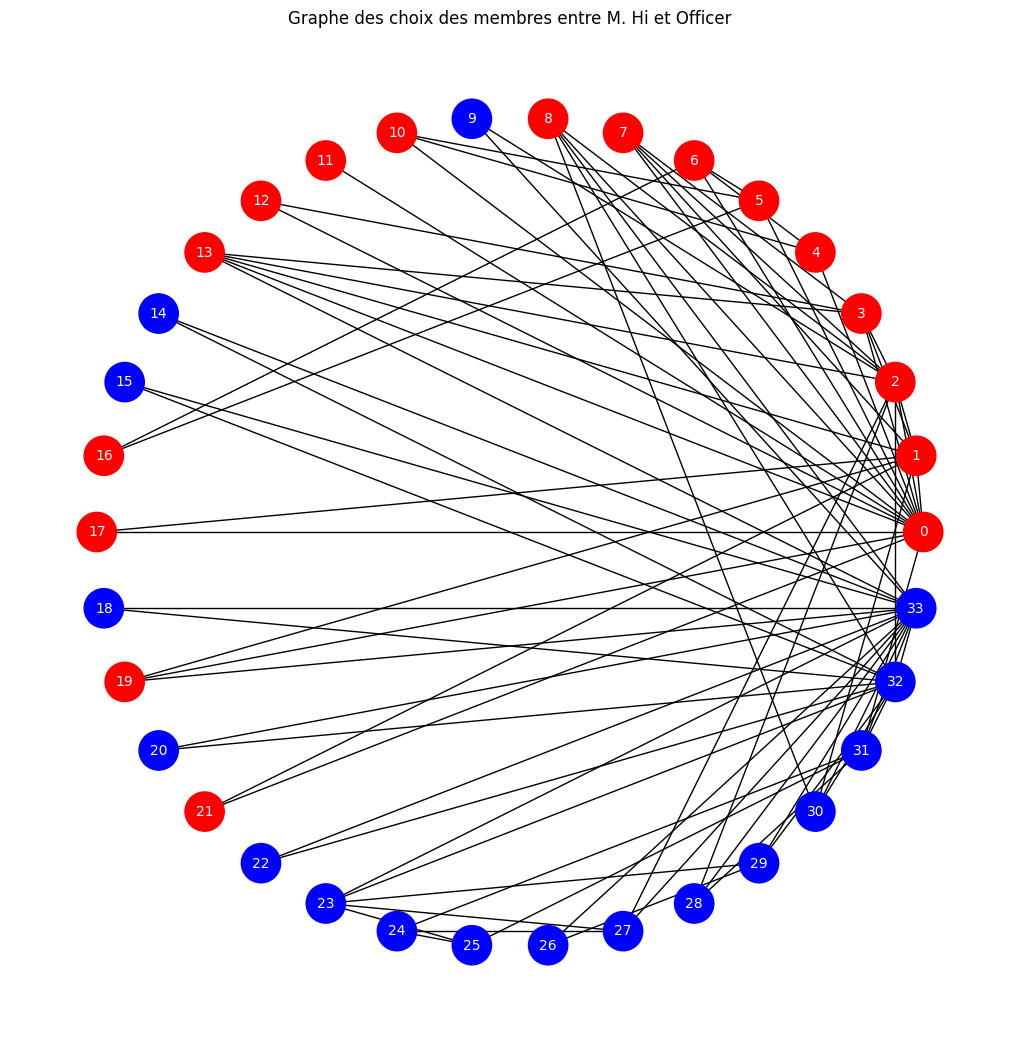

([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21],
 [9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [ ]:
# à faire : Visualiser le graphe

################################### Votre code ici ###############################################
#nx.draw(G,pos = nx.circular_layout(G), with_labels = True,.....................)
#nx.draw(G,pos = nx.circular_layout(G), with_labels = True,.....................)
##################################################################################################

# 3. Visualisation du graphe avec circular_layout
pos = nx.circular_layout(G)
colors = ['red' if node in Hi_club else 'blue' for node in G.nodes()]

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=800, font_size=10, font_color='white')
plt.title("Graphe des choix des membres entre M. Hi et Officer")
plt.show()

(Hi_club, Officer_club)

# II. Transformation du graphe en Tensor

On pourrait s'attendre à ce que la décision de chaque membre de rejoindre l’un des nouveaux clubs soit motivée par ses relations avec les autres membres du club. Donc, si nous avons un modèle des relations entre les individus (c'est-à-dire le graphe), nous devrions être en mesure de prédire le nouveau club  que chaque personne rejoindra.

***le plongement des noeuds du graphes nous donnera le pouvoir de faire cette prédiction !***


Avant de commencer, nous devons d'abord transformaer le graphe $G$ en Pytorch tensor pour qu'on puisse effectuer un apprentissage sur le graphe.


**1. Installation**

Verifier si Pytorch est bien installé

In [ ]:
import torch
print(torch.__version__)

2.5.1+cu121


**2. Mettez toutes les arêtes du graphe dans une liste, et puis  transformez la en Tensor `torch.LongTensor.**

**3. Quelle est la somme `torch.sum` de `pos_edge_index` tensor?**

In [ ]:
# Re-import necessary libraries after reset
import networkx as nx
import torch

# Define the functions
def graph_to_edge_list(G):
    """
    Returns the edge list of a given NetworkX graph as a list of tuples.
    """
    edge_list = list(G.edges())  # Get the edges of the graph
    return edge_list

def edge_list_to_tensor(edge_list):
    """
    Converts an edge list into a PyTorch tensor with shape [2, len(edge_list)].
    """
    edge_index = torch.tensor(edge_list, dtype=torch.long).T  # Transpose to get shape [2, len(edge_list)]
    return edge_index

# Load the Zachary Karate Club graph
G = nx.karate_club_graph()

# Step 2: Get the edge list
pos_edge_list = graph_to_edge_list(G)

# Step 3: Convert edge list to tensor
pos_edge_index = edge_list_to_tensor(pos_edge_list)

# Output the shape and sum of the tensor
tensor_shape = pos_edge_index.shape
tensor_sum = torch.sum(pos_edge_index)

tensor_shape, tensor_sum


(torch.Size([2, 78]), tensor(2535))

**Les arêtes positives et négatives :**

On appele une arête positive une arête qui existe dans le graphe et son étiquette est 1.
Une arête négative est une arête qui n'existe pas dans le graphe et son étiquette est 0.

**4. implementer la foction suivante qui echantillonne des arêtes négatives.**

In [ ]:
import random
import torch

# Ne changez pas le random seed
torch.manual_seed(1)

def sample_negative_edges(G, num_neg_samples):
    """
    Échantillonne des arêtes négatives (arêtes inexistantes) à partir d'un graphe non orienté.

    Args:
        G: Graphe NetworkX.
        num_neg_samples: Nombre d'arêtes négatives à échantillonner.

    Returns:
        Liste d'arêtes négatives.
    """
    neg_edge_list = []
    all_nodes = list(G.nodes())  # Liste des nœuds du graphe
    existing_edges = set(G.edges())  # Ensemble des arêtes existantes

    # Générer toutes les arêtes possibles
    while len(neg_edge_list) < num_neg_samples:
        # Échantillonner deux nœuds aléatoirement
        u, v = random.sample(all_nodes, 2)
        # Vérifier que (u, v) et (v, u) ne sont pas des arêtes existantes
        if (u, v) not in existing_edges and (v, u) not in existing_edges:
            neg_edge


**3. Votre premier Plogement de noeuds**

Enfin, nous terminerons le premier algorithme d'apprentissage sur les graphes : un modèle de plongement de nœuds

**Configuration**

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

2.5.1+cu121


Pour écrire notre propore méthode d'apprentissage de plongement de nœuds, nous utiliserons principalement le module [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) de PyTorch. Voyons comment utiliser `nn.Embedding`

In [ ]:
# Initialiser la couche de plongement
# Supoosons que nous voulons plonger 4 noeuds
# chaque noeud sera representé par un vecteur de 8 dimensions
emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


Sample embedding layer:
 Embedding(4, 8)

Plongements générés pour les nœuds :
 tensor([[ 1.8793, -0.0721,  0.1578, -0.7735,  0.1991,  0.0457,  0.1530, -0.4757],
        [-0.1110,  0.2927, -0.1578, -0.0288,  2.3571, -1.0373,  1.5748, -0.6298],
        [-0.9274,  0.5451,  0.0663, -0.4370,  0.7626,  0.4415,  1.1651,  2.0154],
        [ 0.1374,  0.9386, -0.1860, -0.6446,  1.5392, -0.8696, -3.3312, -0.7479]],
       grad_fn=<EmbeddingBackward0>)


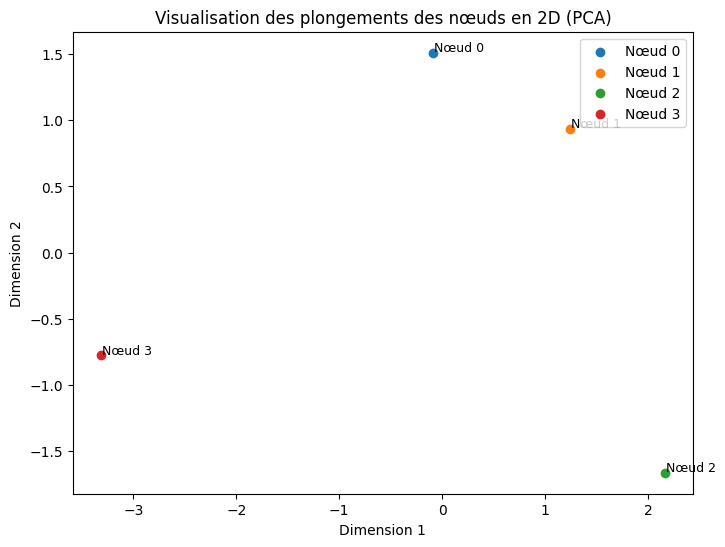

In [ ]:
# Étape 1 : Initialiser la couche de plongement
# Supposons que nous avons 4 nœuds, et que chaque nœud sera représenté par un vecteur de 8 dimensions
emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer:\n', emb_sample)

# Étape 2 : Générer des indices de nœuds (par exemple, de 0 à 3)
node_indices = torch.tensor([0, 1, 2, 3], dtype=torch.long)

# Obtenir les vecteurs de plongement pour ces nœuds
node_embeddings = emb_sample(node_indices)
print("\nPlongements générés pour les nœuds :\n", node_embeddings)

# Étape 3 : Réduire les dimensions avec PCA (pour visualisation 2D)
pca = PCA(n_components=2)
node_embeddings_2d = pca.fit_transform(node_embeddings.detach().numpy())

# Étape 4 : Visualiser les plongements en 2D
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(node_embeddings_2d):
    plt.scatter(x, y, label=f"Nœud {i}")
    plt.text(x + 0.01, y + 0.01, f"Nœud {i}", fontsize=9)
plt.title("Visualisation des plongements des nœuds en 2D (PCA)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

Nous pouvons sélectionner des éléments de la matrice de plongement, en utilisant les indices des Tensors

In [ ]:
# Selectionner un vecteur de plongement de la matrice emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Selectionner plusieurs plongements (le 1er et le 3eme)
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Afficherle shape de la matrice des poids des plongements
shape = emb_sample.weight.data.shape
print(shape)

# Ecraser tous les poids par un tensor contenant que des 1
emb_sample.weight.data = torch.ones(shape)

# Verifions, si les plogements ont été bien initialisés
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[-0.1110,  0.2927, -0.1578, -0.0288,  2.3571, -1.0373,  1.5748, -0.6298]],
       grad_fn=<EmbeddingBackward0>)
tensor([[-0.1110,  0.2927, -0.1578, -0.0288,  2.3571, -1.0373,  1.5748, -0.6298],
        [ 0.1374,  0.9386, -0.1860, -0.6446,  1.5392, -0.8696, -3.3312, -0.7479]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


Nous allons maintenant créer la matrice de plongement des noeuds du graphe Karaté Club.
On veut representer chaque noeud par un vecteur de $16$ dimensions. On veut egalement initialiser la matrice par des nombres réels entre $[0,1[$ issus d'une distribution uniforme. on vous suggére d'utiliser` torch.rand`

In [ ]:
import random
import torch

# Ne changez pas le random seed
torch.manual_seed(1)

def sample_negative_edges(G, num_neg_samples):
    """
    Échantillonne des arêtes négatives (arêtes inexistantes) à partir d'un graphe non orienté.

    Args:
        G: Graphe NetworkX.
        num_neg_samples: Nombre d'arêtes négatives à échantillonner.

    Returns:
        Liste d'arêtes négatives.
    """
    neg_edge_list = []
    all_nodes = list(G.nodes())  # Liste des nœuds du graphe
    existing_edges = set(G.edges())  # Ensemble des arêtes existantes

    # Générer toutes les arêtes possibles
    while len(neg_edge_list) < num_neg_samples:
        # Échantillonner deux nœuds aléatoirement
        u, v = random.sample(all_nodes, 2)
        # Vérifier que (u, v) et (v, u) ne sont pas des arêtes existantes
        if (u, v) not in existing_edges and (v, u) not in existing_edges:
            neg_edge_list.append((u, v))

    return neg_edge_list

# Charger le graphe Karate Club
G = nx.karate_club_graph()

# Échantillonner 78 arêtes négatives
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transformer la liste en vecteur
def edge_list_to_tensor(edge_list):
    """
    Transforme une liste d'arêtes en un tenseur PyTorch.
    """
    edge_index = torch.tensor(edge_list, dtype=torch.long).T
    return edge_index

neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Fonction pour créer la matrice de plongements
def create_node_emb(num_node=34, embedding_dim=16):
    """
    Crée une couche de plongements pour les nœuds d'un graphe.

    Args:
        num_node: Nombre total de nœuds dans le graphe.
        embedding_dim: Dimension des vecteurs de plongement.

    Returns:
        Une couche torch.nn.Embedding initialisée uniformément.
    """
    emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
    nn.init.uniform_(emb.weight, a=0.0, b=1.0)  # Initialisation uniforme entre [0, 1)
    return emb

# Créer la couche de plongement
emb = create_node_emb()
ids = torch.LongTensor([1, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# Exemple: obtenir les plongements des nœuds 1 et 3
print(emb(ids))


The neg_edge_index tensor has shape torch.Size([2, 78])
Embedding: Embedding(34, 16)
tensor([[0.2796, 0.3273, 0.3835, 0.2156, 0.6563, 0.5041, 0.1733, 0.2145, 0.6059,
         0.4929, 0.8539, 0.4242, 0.0949, 0.1302, 0.3532, 0.3893],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


**Visualiser vos plongements**

Pour bien comprendre la notion de plongement, il est indispensable de visualiser les vecteurs de plongement dans un espace 2D.
La fonction  ci-dessous permet de  visualiser les plongements dans un esapce 2D. La fonction effectue  une ACP pour réduire la dimensionnalité des plongements à un espace 2D.

Visualisez ensuite chaque point, coloré par la communauté à laquelle il appartient (dans cette example son nouveau club).

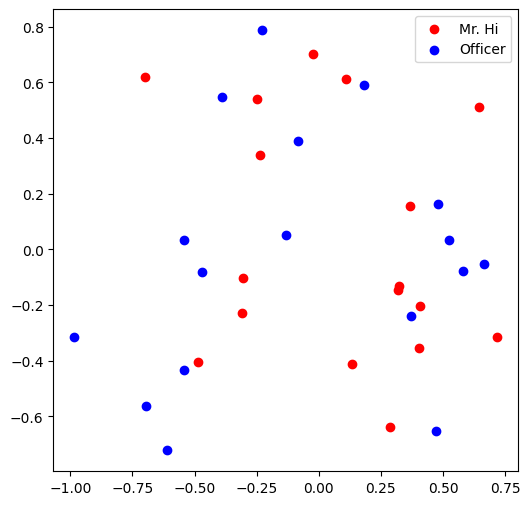

In [ ]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualiser les plongements initiaux aléatoires
visualize_emb(emb)

**Entrainer votre modele !**

The neg_edge_index tensor has shape torch.Size([2, 78])
Embedding: Embedding(34, 16)
tensor([[0.2796, 0.3273, 0.3835, 0.2156, 0.6563, 0.5041, 0.1733, 0.2145, 0.6059,
         0.4929, 0.8539, 0.4242, 0.0949, 0.1302, 0.3532, 0.3893],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


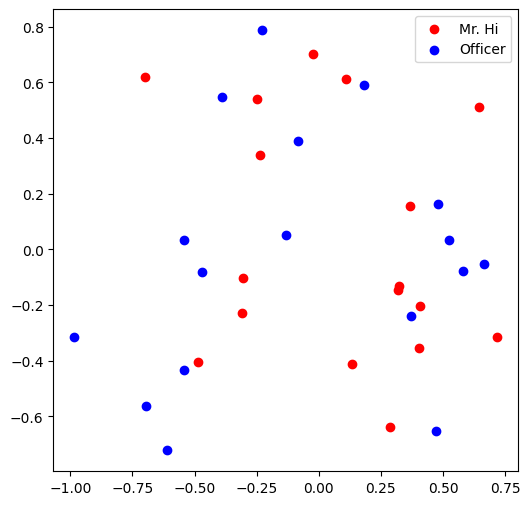

Epoch 100/5000, Loss: 0.2909, Accuracy: 0.9808
Epoch 200/5000, Loss: 0.0915, Accuracy: 1.0000
Epoch 300/5000, Loss: 0.0420, Accuracy: 1.0000
Epoch 400/5000, Loss: 0.0250, Accuracy: 1.0000
Epoch 500/5000, Loss: 0.0171, Accuracy: 1.0000
Epoch 600/5000, Loss: 0.0127, Accuracy: 1.0000
Epoch 700/5000, Loss: 0.0100, Accuracy: 1.0000
Epoch 800/5000, Loss: 0.0082, Accuracy: 1.0000
Epoch 900/5000, Loss: 0.0069, Accuracy: 1.0000
Epoch 1000/5000, Loss: 0.0059, Accuracy: 1.0000
Epoch 1100/5000, Loss: 0.0051, Accuracy: 1.0000
Epoch 1200/5000, Loss: 0.0045, Accuracy: 1.0000
Epoch 1300/5000, Loss: 0.0041, Accuracy: 1.0000
Epoch 1400/5000, Loss: 0.0037, Accuracy: 1.0000
Epoch 1500/5000, Loss: 0.0033, Accuracy: 1.0000
Epoch 1600/5000, Loss: 0.0031, Accuracy: 1.0000
Epoch 1700/5000, Loss: 0.0028, Accuracy: 1.0000
Epoch 1800/5000, Loss: 0.0026, Accuracy: 1.0000
Epoch 1900/5000, Loss: 0.0024, Accuracy: 1.0000
Epoch 2000/5000, Loss: 0.0023, Accuracy: 1.0000
Epoch 2100/5000, Loss: 0.0021, Accuracy: 1.0000
E

In [ ]:
import random
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torch.optim import SGD

# Ne changez pas le random seed
torch.manual_seed(1)

def sample_negative_edges(G, num_neg_samples):
    """
    Échantillonne des arêtes négatives (arêtes inexistantes) à partir d'un graphe non orienté.

    Args:
        G: Graphe NetworkX.
        num_neg_samples: Nombre d'arêtes négatives à échantillonner.

    Returns:
        Liste d'arêtes négatives.
    """
    neg_edge_list = []
    all_nodes = list(G.nodes())  # Liste des nœuds du graphe
    existing_edges = set(G.edges())  # Ensemble des arêtes existantes

    # Générer toutes les arêtes possibles
    while len(neg_edge_list) < num_neg_samples:
        # Échantillonner deux nœuds aléatoirement
        u, v = random.sample(all_nodes, 2)
        # Vérifier que (u, v) et (v, u) ne sont pas des arêtes existantes
        if (u, v) not in existing_edges and (v, u) not in existing_edges:
            neg_edge_list.append((u, v))

    return neg_edge_list

# Charger le graphe Karate Club
G = nx.karate_club_graph()

# Échantillonner 78 arêtes négatives
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transformer la liste en vecteur
def edge_list_to_tensor(edge_list):
    """
    Transforme une liste d'arêtes en un tenseur PyTorch.
    """
    edge_index = torch.tensor(edge_list, dtype=torch.long).T
    return edge_index

neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Fonction pour créer la matrice de plongements
def create_node_emb(num_node=34, embedding_dim=16):
    """
    Crée une couche de plongements pour les nœuds d'un graphe.

    Args:
        num_node: Nombre total de nœuds dans le graphe.
        embedding_dim: Dimension des vecteurs de plongement.

    Returns:
        Une couche torch.nn.Embedding initialisée uniformément.
    """
    emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
    nn.init.uniform_(emb.weight, a=0.0, b=1.0)  # Initialisation uniforme entre [0, 1)
    return emb

# Créer la couche de plongement
emb = create_node_emb()
ids = torch.LongTensor([1, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# Exemple: obtenir les plongements des nœuds 1 et 3
print(emb(ids))

def visualize_emb(emb):
    """
    Visualise les plongements des nœuds dans un espace 2D.
    Les points sont colorés selon leur club.
    """
    X = emb.weight.data.numpy()
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(6, 6))
    club1_x = []
    club1_y = []
    club2_x = []
    club2_y = []
    for node in G.nodes(data=True):
        if node[1]['club'] == 'Mr. Hi':
            club1_x.append(components[node[0]][0])
            club1_y.append(components[node[0]][1])
        else:
            club2_x.append(components[node[0]][0])
            club2_y.append(components[node[0]][1])
    plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
    plt.scatter(club2_x, club2_y, color="blue", label="Officer")
    plt.legend()
    plt.show()

# Visualiser les plongements initiaux aléatoires
visualize_emb(emb)

def accuracy(pred, label):
    """
    Calcule l'accuracy en comparant les prédictions binaires avec les labels.
    """
    pred_binary = (pred > 0.5).float()
    accu = (pred_binary == label).float().mean().item()
    return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
    """
    Entraîne la couche de plongements sur les arêtes du graphe.

    Args:
        emb: Couche de plongements.
        loss_fn: Fonction de perte (ex. BCELoss).
        sigmoid: Fonction Sigmoid.
        train_label: Labels des arêtes (positives/négatives).
        train_edge: Tensor des arêtes (positives/négatives).
    """
    epochs = 5000
    learning_rate = 0.1

    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

    for epoch in range(epochs):
        optimizer.zero_grad()

        # Récupérer les plongements des nœuds
        src_nodes = train_edge[0]
        tgt_nodes = train_edge[1]
        src_emb = emb(src_nodes)
        tgt_emb = emb(tgt_nodes)

        # Calculer le produit scalaire
        dot_product = (src_emb * tgt_emb).sum(dim=1)

        # Appliquer la fonction Sigmoid
        pred = sigmoid(dot_product)

        # Calculer la perte
        loss = loss_fn(pred, train_label)

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Calculer l'accuracy
        acc = accuracy(pred, train_label)

        # Afficher la perte et l'accuracy chaque 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Générer  les labels positifs et négatifs
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concatener les labels positifs and négatifs dans un tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concatener les arêtes positives et négatives dans un tensor
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

train(emb, loss_fn, sigmoid, train_label, train_edge)


**Visualiser le nouveau plognement**

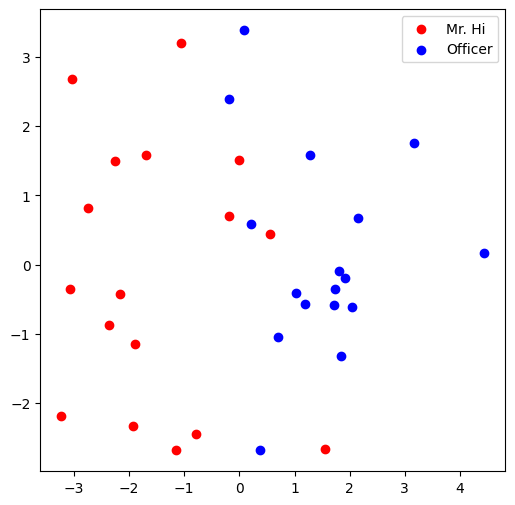

In [ ]:
# Visualiser le dernier plongment appris
visualize_emb(emb)